## Привет!
### Тут хочу привести описание задачи и рассказать, что ожидается

## Описание задачи

- В ходе работы с КТ-исследованиями врачам радиологам порой необходимо проводить рутинные измерения внутренних органов (например, линейные размеры, объём). Автоматизация этих процессов позволит снизить нагрузку на врачей и сократить время обработки каждого исследования.
- В свою очередь локализация внутренних органов (определение ROI вокруг целевого органа) может являться первым этапом пайплайна решения клинических задач по поиску их патологий.

### В связи с этим предлагается решить задачу сегментации органов брюшной полости (ОБП) на коронарных проекциях КТ ОБП.

### Данные

- Предлагаемые данные получены из открытых датсетов TotalSegmentator и AMOS22 путём сэмплирования нескольких коронарных проекций из 3D-массива исследования.
- Из каждого исследования взяты по 6 срезов на разных уровнях (продвигаясь от спины к животу). Нейминг данных следующий: {DATASET_NAME} _ id{ID_NUM} _ slice{SLICE_NUM} _ {img/label}.npy
- Все снимки приведены к одинаковому spacing (шагу срезов) по всем осям - [0.8мм, 0.8мм, 0.8мм]
- Данные представлены в виде numpy array размером WxH. Значения интенсивности пикселей для избражений соответствуют плотности по шкале Хаунсфилда (рентгеновская плотность вещества)
- Кодировка классов в разметке:
    - 0 - фон
    - 1 - селезёнка
    - 2 - правая почка
    - 3 - левая почка
    - 4 - желчный пузырь
    - 5 - пищевод
    - 6 - печень
    - 7 - желудок
    - 8 - аорта
    - 9 - поджелудочная железа
    - 10 - надпочечник правый
    - 11 - надпочечник левый
    - 12 - кишечник
    
Задачу сегментации предлагаю решать для классов 1, 2, 3, 6, 7, 8, 9

Основная метрика качества - коэффициент Дайса. Также буду обращать внимание на confusion matrix (в большей степени с другими органами)

Использование дополнительных данных и оставшихся классов ни коим образом не порицается, всё на твоё усмотрение, но обо всём необходимо упомянуть в отчёте)

В тесте будут присутствовать не только данные из предоставленных датасетов.

### Что требуется?

- Решить задачу сегментации для указанных выше классов
- Представить:
    - Веса и метрики для лучшей модели
    - Код для инференса модели 
        - input - image: np.array # формат данных аналогичный предоставленным
        - output - label: np.array # формат данных аналогичный предоставленным, указать используемую кодировку классов
    - Код для воспроизведения модельки
    - Отчёт в удобной тебе форме
    
### Что ожидается в отчёте
- Основная задача - посмотреть на ход рассуждений и проведённые эксперименты, поэтому предлагается полная свобода действий.
- Будет интересно почитать любые гипотезы и идеи, даже если они не выстрелили или не хватило времени на их реализацию.
- Анализ данных и ошибок модельки, а также критика и/или планы, как можно улучшиться, тоже приветствуются)

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def vis_one(image: np.array, label: np.array, soft_tissue_window: bool = False):

    plt.figure("Sample", (10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Image")
    # нормировка для повышения контрастности мягких тканей
    if soft_tissue_window:
        image = np.clip(image, -350, 400)
        image += 350
        image /= 750
    plt.imshow(image, cmap="gray")
    
    plt.subplot(1, 2, 2)
    plt.title("Label")
    plt.imshow(label)
        
    plt.show()
    
def vis_random_batch(data_root: str, num: int = 16, soft_tissue_window: bool = False):
    ls = os.listdir(os.path.join(data_root, 'images'))
    random.shuffle(ls)
    
    for item in ls[:num]:
        with open(os.path.join(data_root, 'images', item), 'rb') as f:
            img = np.load(f)
        with open(os.path.join(data_root, 'labels', item.replace('img', 'lbl')), 'rb') as f:
            lbl = np.load(f)   
        vis_one(img, lbl, soft_tissue_window)    

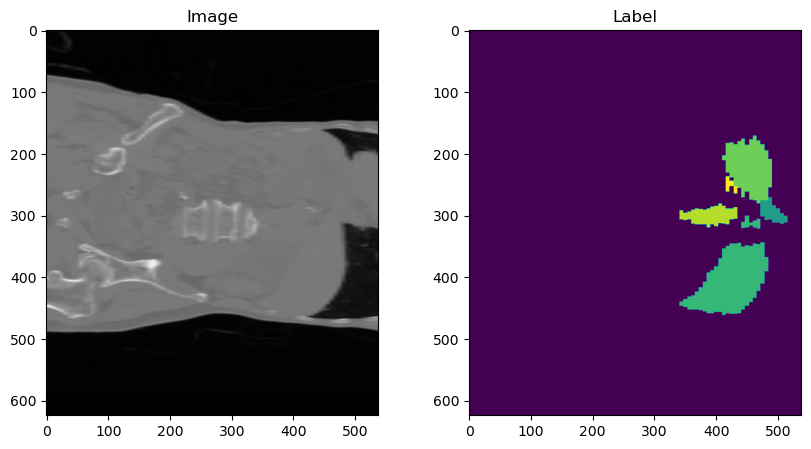

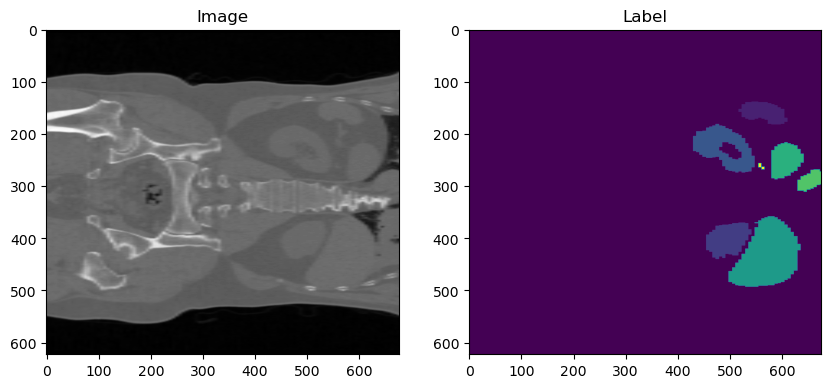

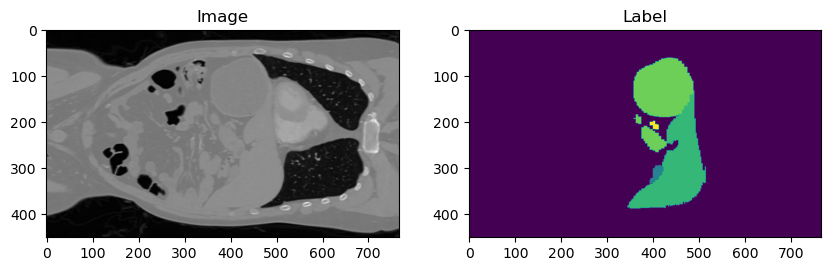

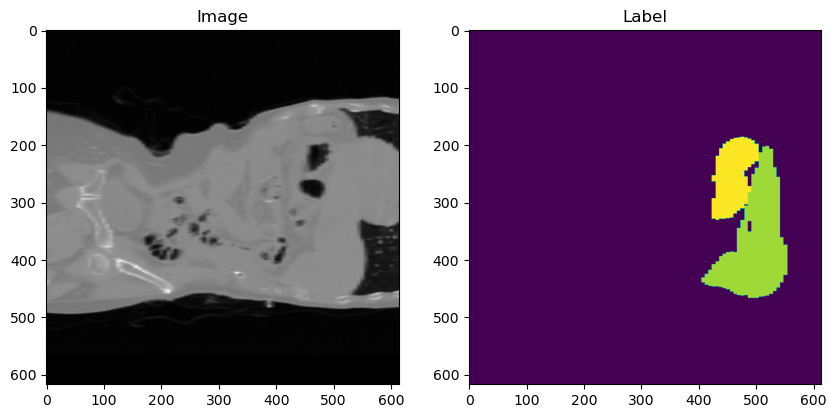

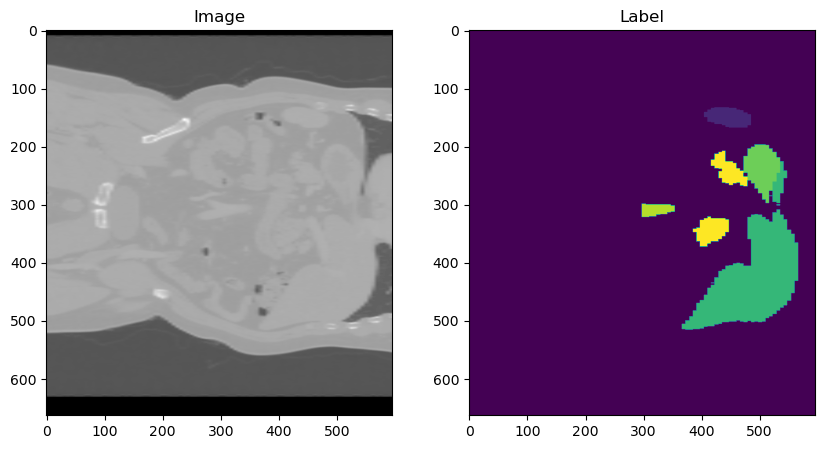

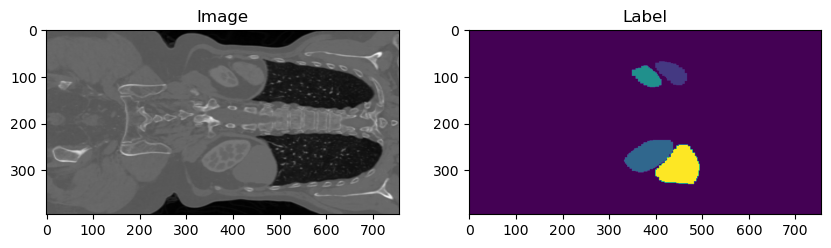

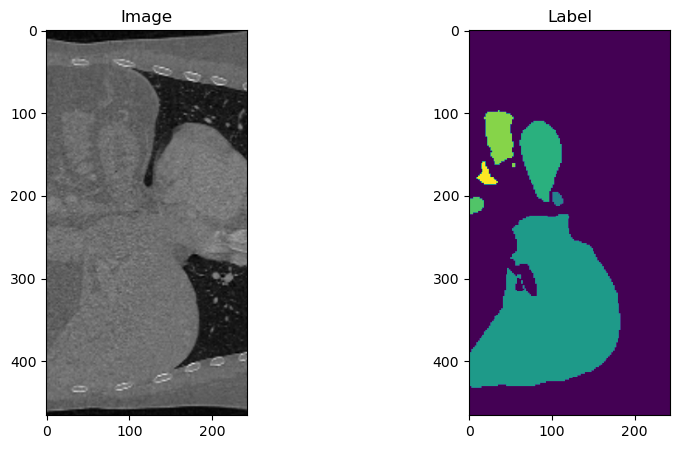

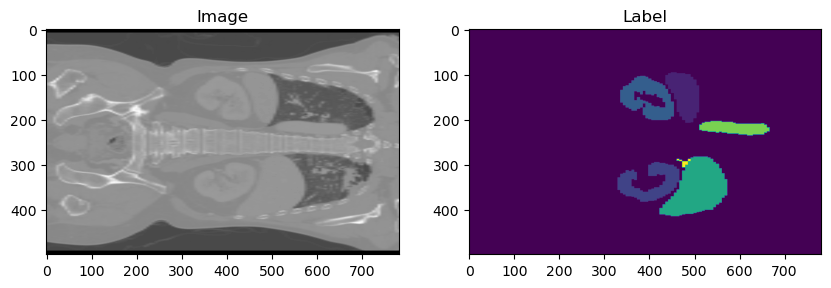

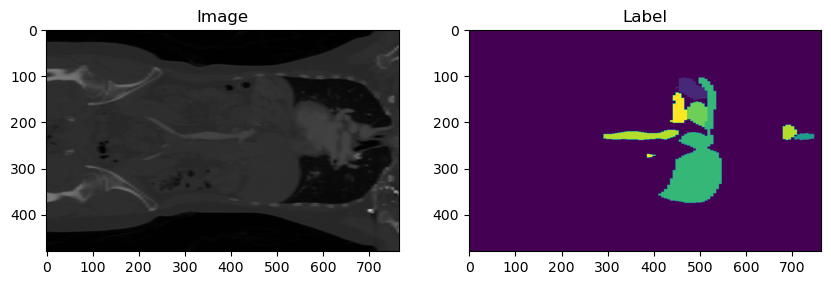

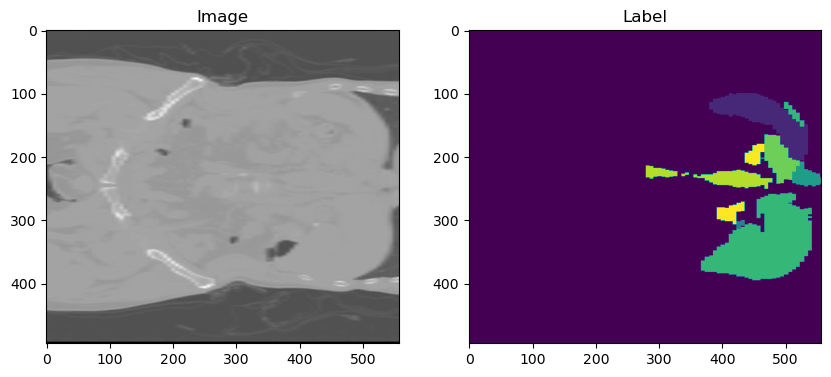

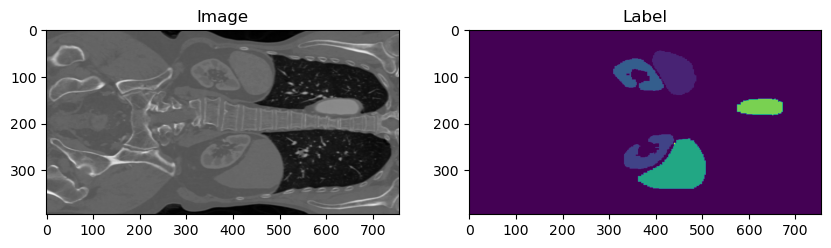

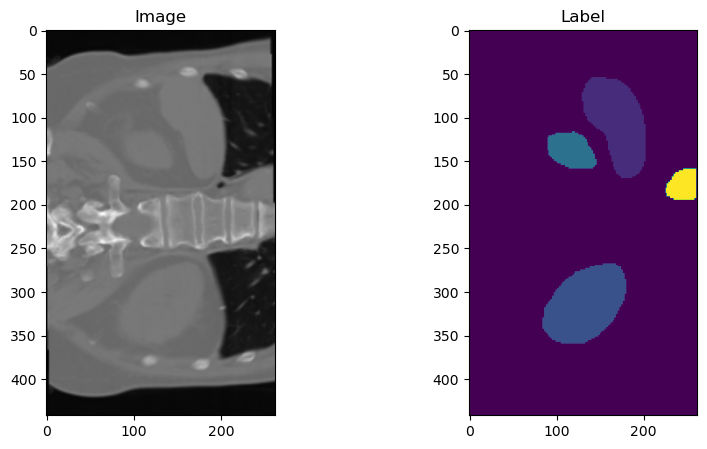

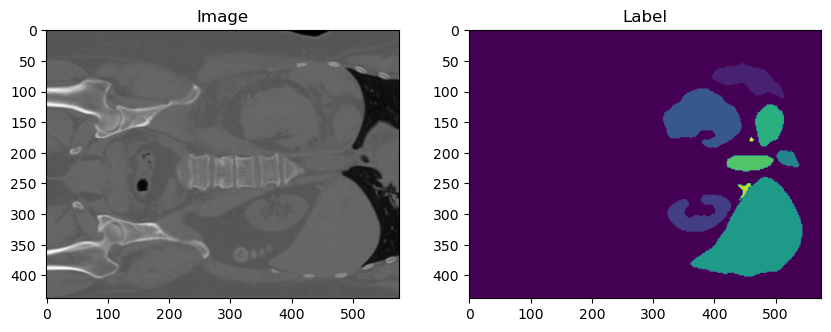

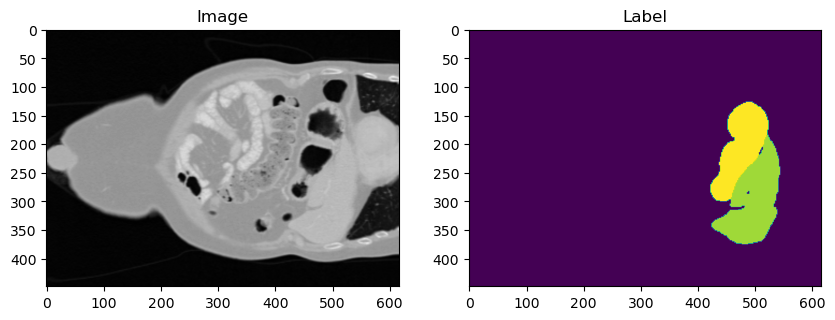

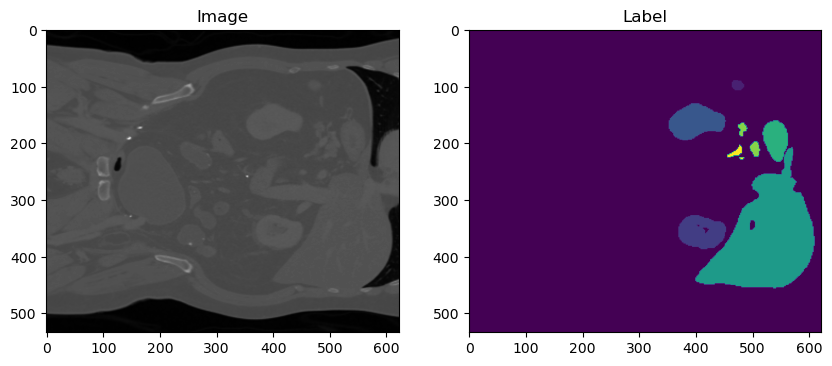

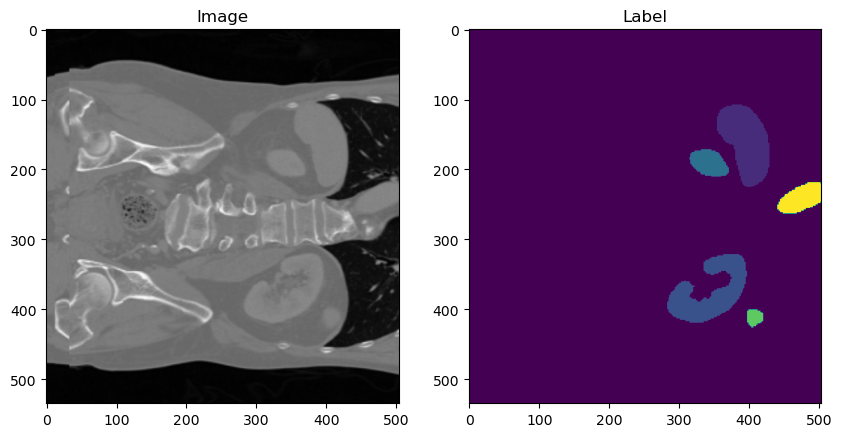

In [2]:
vis_random_batch('/path/to/data', 16, False)

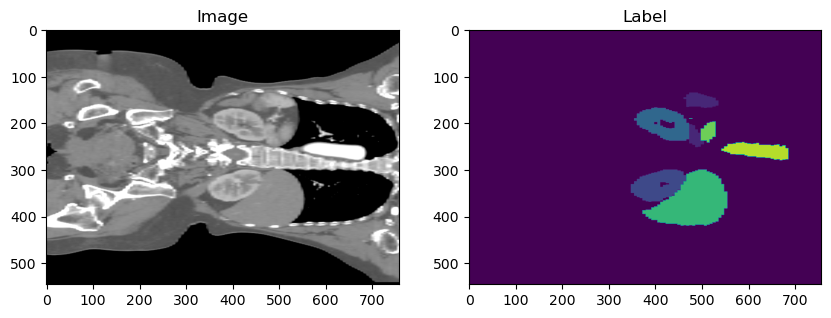

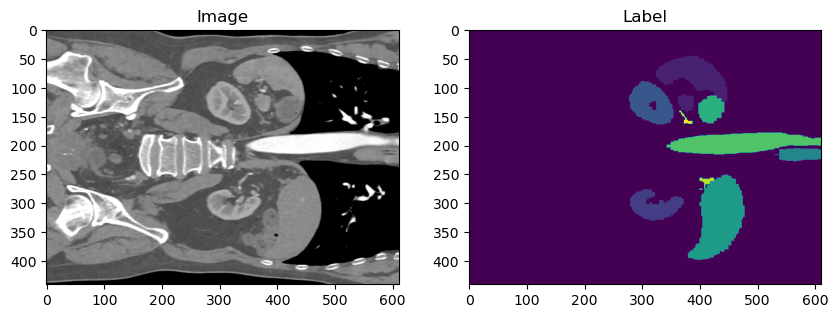

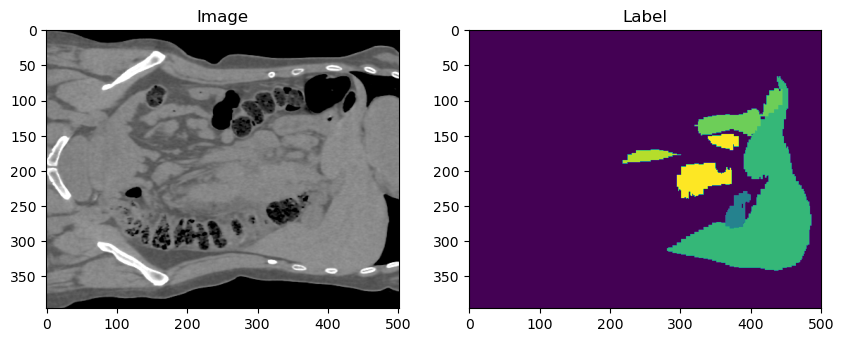

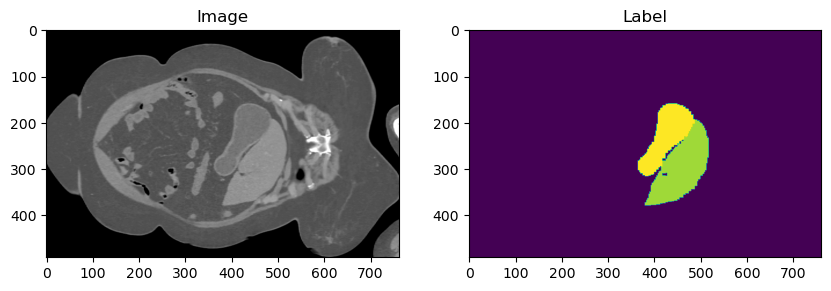

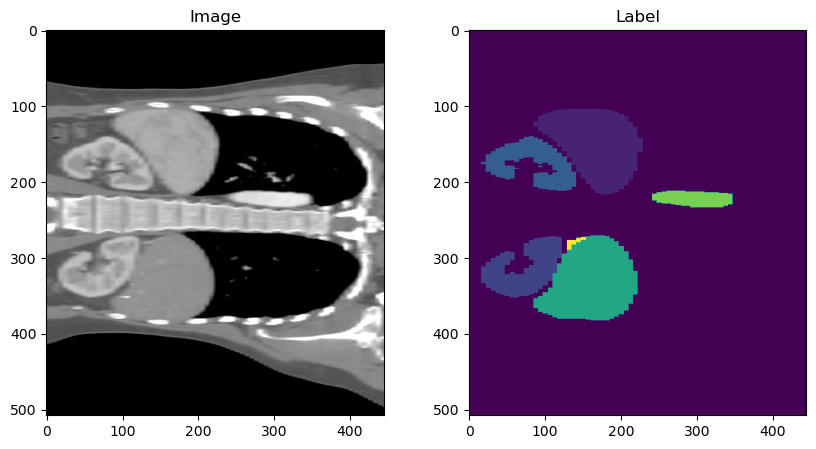

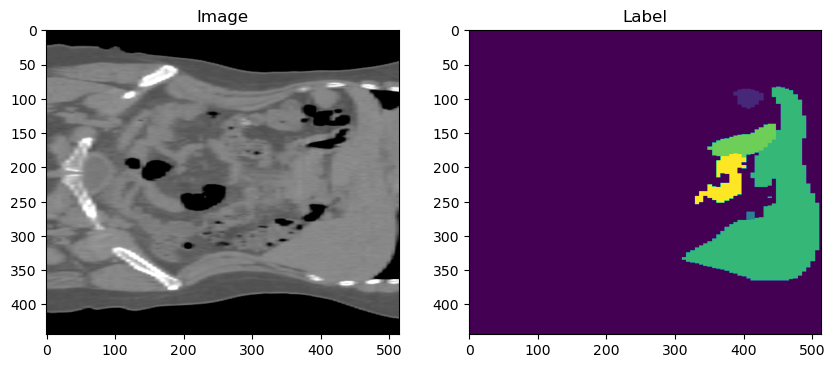

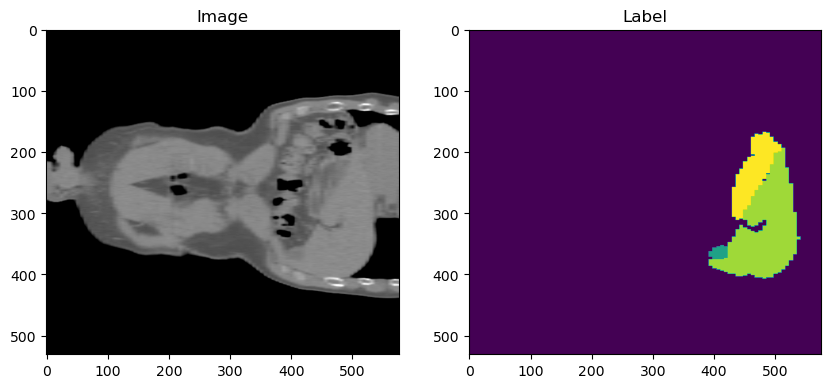

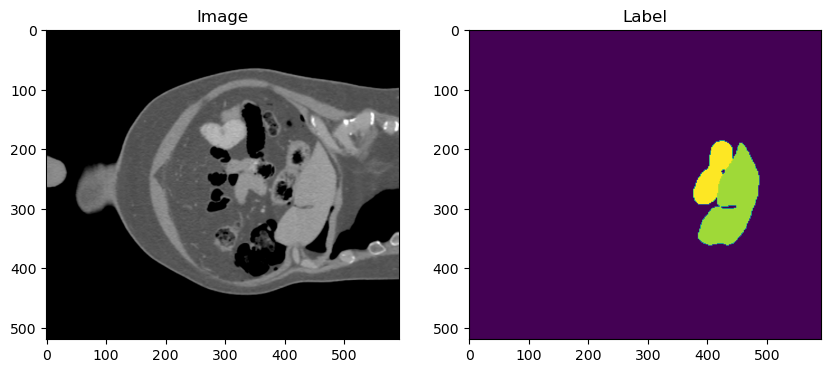

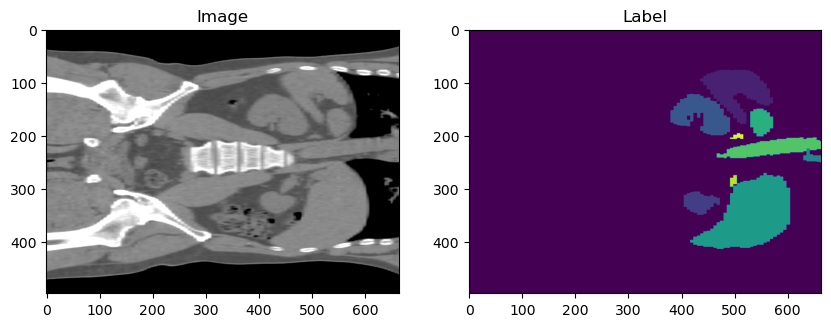

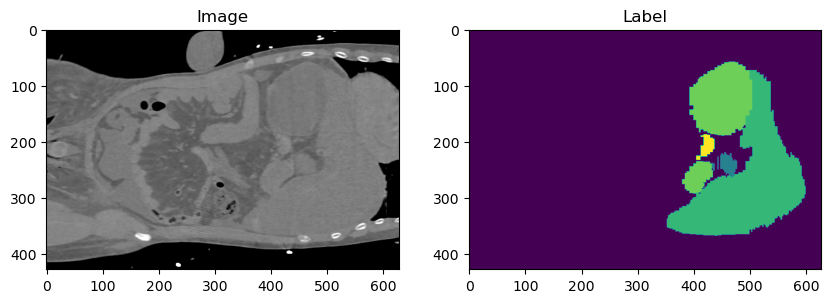

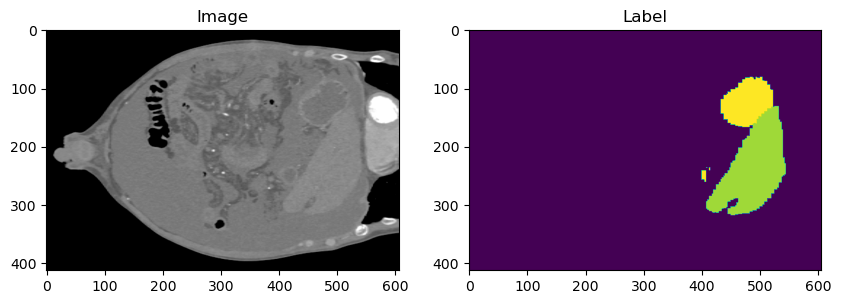

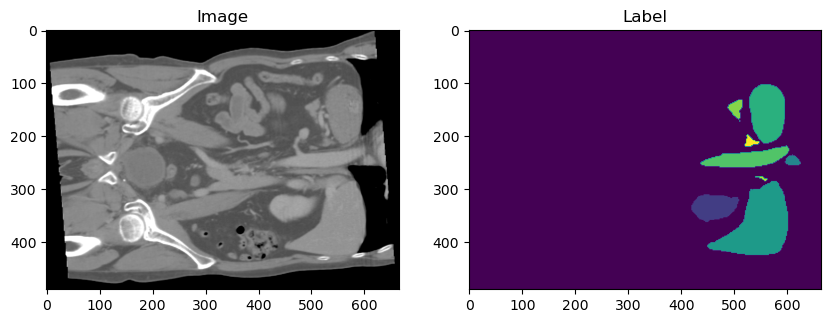

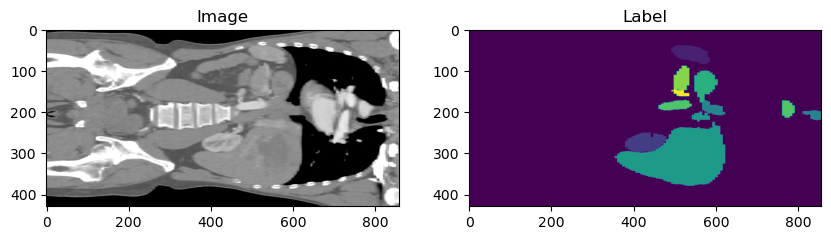

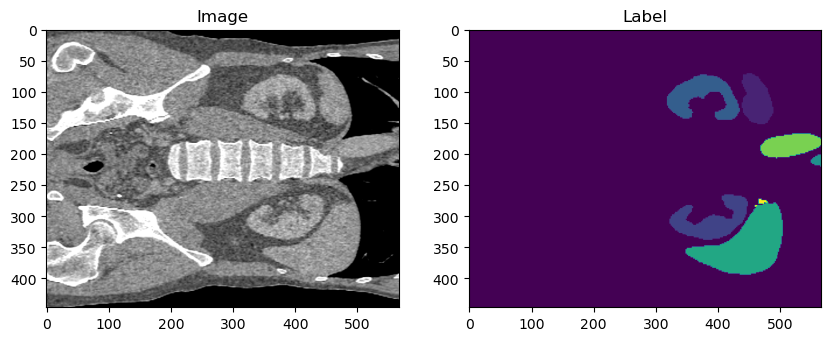

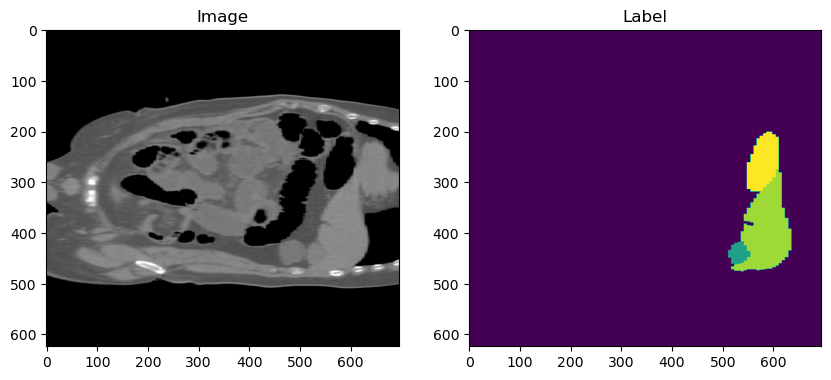

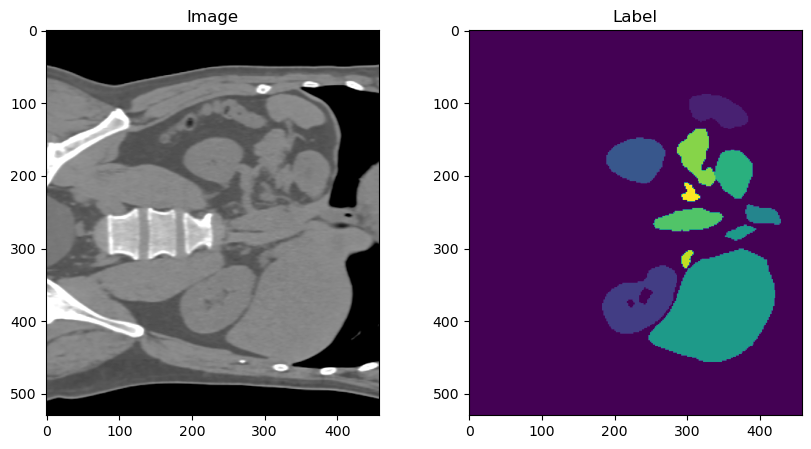

In [3]:
vis_random_batch('/path/to/data', 16, True)